<h1><center>Tabela Periódica</center></h1>

<h1>Importanto bibliotecas</h1>

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dados

In [127]:
df = pd.read_csv('tabela_periodica.csv')
df.head()

,AtomicNumber,Symbol,Name,AtomicMass,CPKHexColor,ElectronConfiguration,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,OxidationStates,StandardState,MeltingPoint,BoilingPoint,Density,GroupBlock,YearDiscovered
0,1,H,Hidrogênio,1.008000,FFFFFF,1s1,2.20,120.0,13.598,0.754,"+1, -1",Gás,13.81,20.28,0.000090,Não metal,1766
1,2,He,Hélio,4.002600,D9FFFF,1s2,NaN,140.0,24.587,NaN,0,Gás,0.95,4.22,0.000179,Gás Nobre,1868
2,3,Li,Lítio,7.000000,CC80FF,[He]2s1,0.98,182.0,5.392,0.618,+1,Sólido,453.65,1615.00,0.534000,Metal Alcalino,1817
3,4,Be,Berílio,9.012183,C2FF00,[He]2s2,1.57,153.0,9.323,NaN,+2,Sólido,1560.00,2744.00,1.850000,Metal Alcalino Terroso,1798
4,5,B,Boro,10.810000,FFB5B5,[He]2s2 2p1,2.04,192.0,8.298,0.277,+3,Sólido,2348.00,4273.00,2.370000,Semi-metal,1808


<h2>Informações sobre os dados</h2>

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AtomicNumber           118 non-null    int64  
 1   Symbol                 118 non-null    object 
 2   Name                   118 non-null    object 
 3   AtomicMass             118 non-null    float64
 4   CPKHexColor            108 non-null    object 
 5   ElectronConfiguration  118 non-null    object 
 6   Electronegativity      95 non-null     float64
 7   AtomicRadius           99 non-null     float64
 8   IonizationEnergy       102 non-null    float64
 9   ElectronAffinity       57 non-null     float64
 10  OxidationStates        117 non-null    object 
 11  StandardState          118 non-null    object 
 12  MeltingPoint           103 non-null    float64
 13  BoilingPoint           93 non-null     float64
 14  Density                96 non-null     float64
 15  GroupB

<h1>Pré-processamento</h1>

<h2>Valores Nulos</h2>

In [129]:
# Listando as colunas que contém valores nulos
nulos = df.isna().sum()
df_nulos = nulos.reset_index(name='Qtde')
df_nulos[df_nulos.Qtde > 0]


,index,Qtde
4,CPKHexColor,10
6,Electronegativity,23
7,AtomicRadius,19
8,IonizationEnergy,16
9,ElectronAffinity,61
10,OxidationStates,1
12,MeltingPoint,15
13,BoilingPoint,25
14,Density,22


In [130]:
df[df.MeltingPoint.isna() == True]

,AtomicNumber,Symbol,Name,AtomicMass,CPKHexColor,ElectronConfiguration,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,OxidationStates,StandardState,MeltingPoint,BoilingPoint,Density,GroupBlock,YearDiscovered
103,104,Rf,Rutherfórdio,267.1220,CC0059,[Rn]7s2 5f14 6d2,NaN,NaN,NaN,NaN,+4,Sólido,NaN,NaN,NaN,Metal de Transição,1964
104,105,Db,Dúbnio,268.1260,D1004F,[Rn]7s2 5f14 6d3,NaN,NaN,NaN,NaN,"5, 4, 3",Sólido,NaN,NaN,NaN,Metal de Transição,1967
105,106,Sg,Seabórgio,269.1280,D90045,[Rn]7s2 5f14 6d4,NaN,NaN,NaN,NaN,"6, 5, 4, 3, 0",Sólido,NaN,NaN,NaN,Metal de Transição,1974
106,107,Bh,Bóhrio,270.1330,E00038,[Rn]7s2 5f14 6d5,NaN,NaN,NaN,NaN,"7, 5, 4, 3",Sólido,NaN,NaN,NaN,Metal de Transição,1976
107,108,Hs,Hássio,269.1336,E6002E,[Rn]7s2 5f14 6d6,NaN,NaN,NaN,NaN,"8, 6, 5, 4, 3, 2",Sólido,NaN,NaN,NaN,Metal de Transição,1984
108,109,Mt,Meitnério,277.1540,EB0026,[Rn]7s2 5f14 6d7 (calculated),NaN,NaN,NaN,NaN,"9, 8, 6, 4, 3, 1",Sólido,NaN,NaN,NaN,Metal de Transição,1982
109,110,Ds,Darmstádio,282.1660,NaN,[Rn]7s2 5f14 6d8 (predicted),NaN,NaN,NaN,NaN,"8, 6, 4, 2, 0",Possível Sólido,NaN,NaN,NaN,Metal de Transição,1994
110,111,Rg,Roentgênio,282.1690,NaN,[Rn]7s2 5f14 6d9 (predicted),NaN,NaN,NaN,NaN,"5, 3, 1, -1",Possível Sólido,NaN,NaN,NaN,Metal de Transição,1994
111,112,Cn,Copernício,286.1790,NaN,[Rn]7s2 5f14 6d10 (predicted),NaN,NaN,NaN,NaN,"2, 1, 0",Possível Sólido,NaN,NaN,NaN,Metal de Transição,1996
112,113,Nh,Nihônio,286.1820,NaN,[Rn]5f14 6d10 7s2 7p1 (predicted),NaN,NaN,NaN,NaN,NaN,Possível Sólido,NaN,NaN,NaN,Metal de pós-transição,2004


<h2>Eliminando linhas</h2>

In [131]:
df2 = df[df.AtomicNumber < 104]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AtomicNumber           103 non-null    int64  
 1   Symbol                 103 non-null    object 
 2   Name                   103 non-null    object 
 3   AtomicMass             103 non-null    float64
 4   CPKHexColor            102 non-null    object 
 5   ElectronConfiguration  103 non-null    object 
 6   Electronegativity      95 non-null     float64
 7   AtomicRadius           99 non-null     float64
 8   IonizationEnergy       102 non-null    float64
 9   ElectronAffinity       57 non-null     float64
 10  OxidationStates        103 non-null    object 
 11  StandardState          103 non-null    object 
 12  MeltingPoint           103 non-null    float64
 13  BoilingPoint           93 non-null     float64
 14  Density                96 non-null     float64
 15  GroupB

In [132]:
# Listando as colunas que contém valores nulos
nulos2 = df2.isna().sum()
df2_nulos = nulos.reset_index(name='Qtde')
df2_nulos[df2_nulos.Qtde > 0]

,index,Qtde
4,CPKHexColor,10
6,Electronegativity,23
7,AtomicRadius,19
8,IonizationEnergy,16
9,ElectronAffinity,61
10,OxidationStates,1
12,MeltingPoint,15
13,BoilingPoint,25
14,Density,22


In [133]:
# Listando elemetos de um tipo específico
tipo = 'Halogênio'
df_listatipo= df2[df2['GroupBlock'] == tipo]
df_listatipo

,AtomicNumber,Symbol,Name,AtomicMass,CPKHexColor,ElectronConfiguration,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,OxidationStates,StandardState,MeltingPoint,BoilingPoint,Density,GroupBlock,YearDiscovered
8,9,F,Flúor,18.998403,90E050,[He]2s2 2p5,3.98,135.0,17.423,3.339,-1,Gás,53.53,85.03,0.001696,Halogênio,1670
16,17,Cl,Cloro,35.450000,1FF01F,[Ne]3s2 3p5,3.16,175.0,12.968,3.617,"+7, +5, +1, -1",Gás,171.65,239.11,0.003214,Halogênio,1774
34,35,Br,Bromo,79.900000,A62929,[Ar]4s2 3d10 4p5,2.96,183.0,11.814,3.365,"+5, +1, -1",Líquido,265.95,331.95,3.110000,Halogênio,1826
52,53,I,Iodo,126.904500,940094,[Kr]5s2 4d10 5p5,2.66,198.0,10.451,3.059,"+7, +5, +1, -1",Sólido,386.85,457.55,4.930000,Halogênio,1811
84,85,At,Astato,209.987150,754F45,[Xe]6s2 4f14 5d10 6p5,2.20,202.0,9.500,2.800,"7, 5, 3, 1, -1",Sólido,575.00,NaN,7.000000,Halogênio,1940


<h1><b>Agrupando dados: <font color='white'>massa atômica</font></b></h1>

<h2>Máximo, mínimo e amplitude do conjunto de dados </h2>

In [134]:
max_massa_atomica = np.around(df2['AtomicMass'].max(), 4)
min_massa_atomica = np.around(df2['AtomicMass'].min(), 4)
amplit_conj_dados = np.around(max_massa_atomica - min_massa_atomica, 4)

print('Maior massa atômica: {0:.4f}'.format(max_massa_atomica))
print('Menor massa atômica: {0:.4f}'.format(min_massa_atomica))
print('Amplitude: {0:.4f}'.format(amplit_conj_dados))

Maior massa atômica: 266.1200
Menor massa atômica: 1.0080
Amplitude: 265.1120


<h2>Quantidade de Classes (k)</h2>

In [135]:
n = len(df2)
k = np.sqrt(n)
print('Quantidade de classes (regra da raiz quadrada): {0:.4f}'.format(k))

# pelo bom senso consideraremos 8 classes
k = 8

Quantidade de classes (regra da raiz quadrada): 10.1489


<h2>Amplitude das classes</h2>

In [136]:
amplit_classes = np.around(amplit_conj_dados / k, 4)

<h2>DataFrame das classes</h2>

In [137]:
limites = []
minimo = min_massa_atomica
for i in range(0, (k)):
    maximo = np.around((minimo + amplit_classes), 4)
    
    # ponto médio
    ponto_medio = np.around(((maximo + minimo) / 2), 4)
    
    limites.append([minimo, maximo, ponto_medio])
    
    minimo = maximo

In [138]:
df_classes = pd.DataFrame(limites, columns=['Limite Inferior', 'Limite Superior', 'Ponto Médio'])

<h2>Frequência Absoluta</h2>

In [139]:
# Calculando frequências
frequencias = []
for limite in limites:
    qtde = df[(df["AtomicMass"] >= limite[0]) & (df["AtomicMass"] < limite[1])]['AtomicMass'].count()
    frequencias.append(qtde)

# Adicionando coluna de frequência absoluta
pos_coluna = len(df_classes.columns)
df_classes.insert(pos_coluna, 'Frequência Absoluta', frequencias, True)
df_classes

,Limite Inferior,Limite Superior,Ponto Médio,Frequência Absoluta
0,1.008,34.147,17.5775,16
1,34.147,67.286,50.7165,14
2,67.286,100.425,83.8555,13
3,100.425,133.564,116.9945,12
4,133.564,166.703,150.1335,12
5,166.703,199.842,183.2725,12
6,199.842,232.981,216.4115,12
7,232.981,266.120,249.5505,11


<h2>Frequência Absoluta Relativa</h2>

In [140]:
total = sum(frequencias)
freq_abs_rel = []
for freq in frequencias:
    perc = np.around((freq / total), 4)
    freq_abs_rel.append(perc)

pos_coluna = len(df_classes.columns)
df_classes.insert(pos_coluna, 'Frequência Absoluta Relativa', freq_abs_rel, True)

<h2>Frequência Absoluta Acumulada</h2>

In [141]:
freq_abs_acumulada = []
acumulado = 0
for freq in frequencias:
    acumulado = acumulado + freq
    freq_abs_acumulada.append(acumulado)

# Adicionando coluna de frequência absoluta acumulada
pos_coluna = len(df_classes.columns)
df_classes.insert(pos_coluna, 'Frequência Absoluta Acumulada', freq_abs_acumulada, True)
df_classes

,Limite Inferior,Limite Superior,Ponto Médio,Frequência Absoluta,Frequência Absoluta Relativa,Frequência Absoluta Acumulada
0,1.008,34.147,17.5775,16,0.1569,16
1,34.147,67.286,50.7165,14,0.1373,30
2,67.286,100.425,83.8555,13,0.1275,43
3,100.425,133.564,116.9945,12,0.1176,55
4,133.564,166.703,150.1335,12,0.1176,67
5,166.703,199.842,183.2725,12,0.1176,79
6,199.842,232.981,216.4115,12,0.1176,91
7,232.981,266.120,249.5505,11,0.1078,102


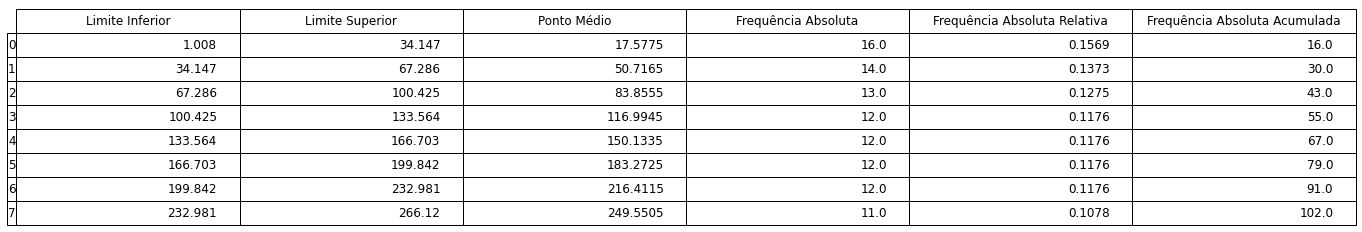

In [155]:
from pandas.plotting import table

fig, ax = plt.subplots(figsize=(12, 2)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = table(ax, df_classes, loc='upper center')  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(2.0, 2.0) # change size table
plt.savefig('table.png', transparent=False)


<h1><b>Grupos de Elementos: frequência, proporção e gráfico</b></h1>

<h2>Frequência</h2>

In [142]:
df_freq_grupos = df.groupby(['GroupBlock'])['GroupBlock'].count().reset_index(name = 'Frequência')

,GroupBlock,Frequência
0,Actinídeos,15
1,Gás Nobre,7
2,Halogênio,6
3,Lantanídeos,15
4,Metal Alcalino,6
5,Metal Alcalino Terroso,6
6,Metal de Transição,38
7,Metal de pós-transição,11
8,Não metal,7
9,Semi-metal,7


<h2>Proporção</h2>

In [143]:
# Proporcao
total = df_freq_grupos['Frequência'].sum()
prop = []
for freq in df_freq_grupos['Frequência']:
    vlr_proporcao = np.around((freq / total), 4)
    prop.append(vlr_proporcao)
    
df_freq_prop_grupos = df_freq_grupos.assign(Proporcao = prop)
df_freq_prop_grupos

,GroupBlock,Frequência,Proporcao
0,Actinídeos,15,0.1271
1,Gás Nobre,7,0.0593
2,Halogênio,6,0.0508
3,Lantanídeos,15,0.1271
4,Metal Alcalino,6,0.0508
5,Metal Alcalino Terroso,6,0.0508
6,Metal de Transição,38,0.3220
7,Metal de pós-transição,11,0.0932
8,Não metal,7,0.0593
9,Semi-metal,7,0.0593


<h2>Gŕafico de Setores</h2>

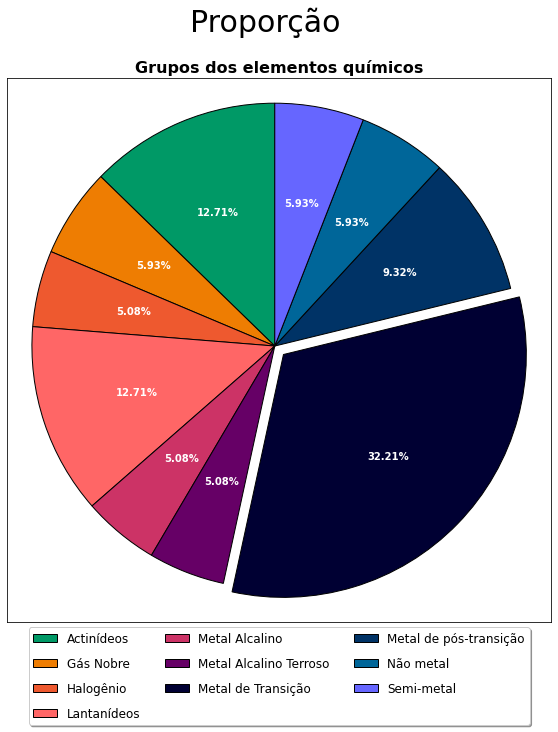

In [144]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Dados
X = df_freq_prop_grupos['Proporcao']
X_label_legenda = df_freq_prop_grupos['GroupBlock']
X_label_grafico = [(str(np.around((proporcao * 100), 2)) + ' %') for proporcao in df_freq_prop_grupos['Proporcao']]

#c Cores
cores = ["#009966", "#ee7d02", "#ee592f", "#ff6666", "#cc3366",
         "#660066", "#000033", "#003366", "#006699", "#6666ff"]

# Gráfico
ax.pie(X, 
       shadow = False,
       #labels = X_label_grafico,
       autopct= '%1.2f%%',
       textprops={'color':"w", 'fontweight':'bold'},
       labeldistance = 1.1,
       frame =  True,
       explode = (X == max(X)) * 0.05,
       startangle = 90,
       colors = cores,
       wedgeprops = {'linewidth': 1, 'visible': True, 'linestyle':'-', 'edgecolor':'black'})

# Titulos
ax.set_title('Grupos dos elementos químicos', fontweight = 'bold', fontsize = 16)
plt.suptitle('Proporção', fontsize = 30)

# Removendo ambos os tick e labels dos eixos (para deixar uma borda no gráfico)
plt.tick_params(left = False,
                right = False,
                labelleft = False,
                labelbottom = False,
                bottom = False)

# Legenda
plt.legend(#title = 'Grupos', 
           labels = X_label_legenda, 
           loc = 'lower center',
           bbox_to_anchor = (0.5, -0.20),        
           ncol = 3, 
           fancybox = True,
           shadow = True,
           fontsize = 12,
           title_fontsize = 15,
           labelspacing = 1) 

# Show
plt.show()